# CS5830 - Group15 - Project 6

## Baseflow Dataset Analysis + Linear Regression

#### Dataset

- `Date` – number of days since 01/01/0000
- `Segment id` – an identifier of the segment of river; it can be treated as a categorical variable
- `x/y` – the spatial location of the gaging station at which observations are obtained
- `Evapotranspiration` – the evapotranspiration amount of an area adjacent to the river segment in the given month
- `Precipitation` - the precipitation amount of an area adjacent to the river segment in the given month
- `Irrigation pumping` - the amount of groundwater pumped out for irrigation in an area adjacent to the river segment in the given month
- `Observed` – observed baseflow \[target\]

#### Imports

In [1]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### Data Preparation

In [2]:
# load the dataset into a pandas dataframe
df = pd.read_csv("RRCA_baseflow.csv")

# convert the "Date" column to date dtype
df['Date'] = df['Date'] - 693963

def toDateTime(days):
    date = datetime(1900,1,1) + timedelta(days)
    return date.strftime("%Y-%m-%d")

df['Date'] = df['Date'].apply(toDateTime)
df['Date'] = pd.to_datetime(df['Date'])

# Add "Year" column
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].astype('int')
df=df.dropna()
display(df.isnull().sum())


Date                  0
Segment_id            0
x                     0
y                     0
Evapotranspiration    0
Precipitation         0
Irrigation_pumping    0
Observed              0
Year                  0
dtype: int64

### Analysis

### Linear Regression

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Year
0,1945-11-30,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945
1,1945-12-31,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945
2,1946-01-28,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946
3,1946-02-28,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946
4,1946-03-30,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946
...,...,...,...,...,...,...,...,...,...
15586,1976-03-30,98,721870,14387040,0.00,0.00,0.0,0.298500,1976
15587,1976-04-30,98,721870,14387040,0.00,0.00,0.0,0.211475,1976
15588,1976-05-30,98,721870,14387040,0.00,0.00,0.0,0.122951,1976
15589,1976-06-30,98,721870,14387040,0.00,0.00,0.0,0.120000,1976


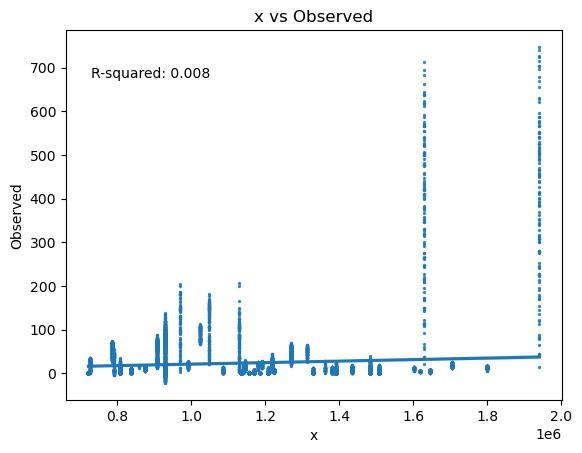

x
Pearson Test: PearsonRResult(statistic=0.08961601998066822, pvalue=3.5817866020810347e-29)
Average: 1169435.2568789686
Standard Deviation: 292499.1341238749


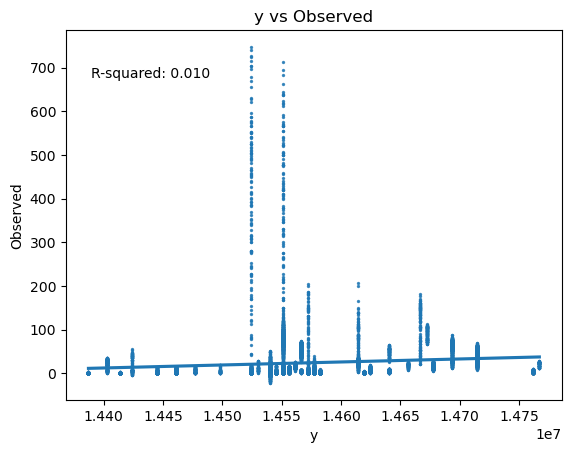

y
Pearson Test: PearsonRResult(statistic=0.10175116338670216, pvalue=3.6781856907517453e-37)
Average: 14570660.457956513
Standard Deviation: 83310.47939781596


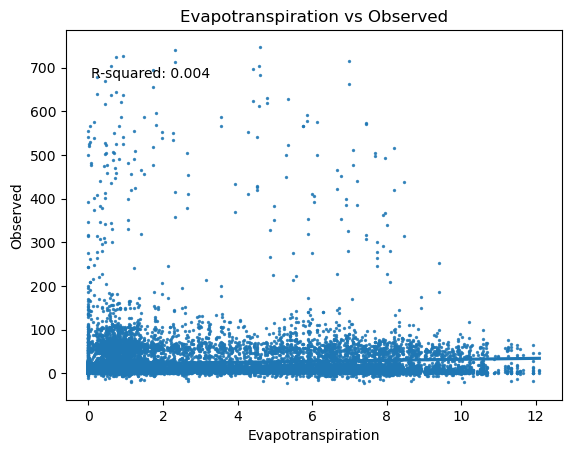

Evapotranspiration
Pearson Test: PearsonRResult(statistic=0.062247828151395006, pvalue=7.285232063544412e-15)
Average: 2.6874908601116143
Standard Deviation: 3.1672348613974446


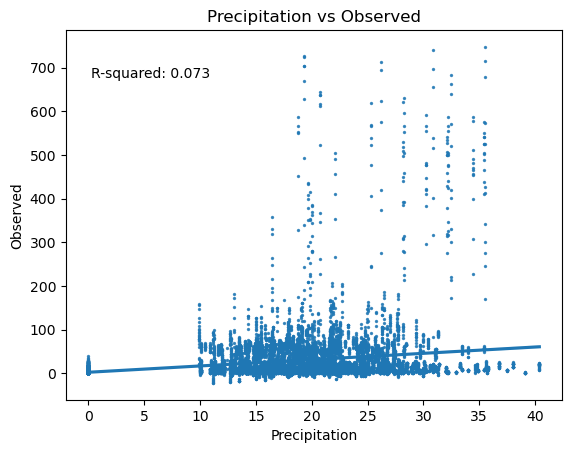

Precipitation
Pearson Test: PearsonRResult(statistic=0.2700333234609299, pvalue=1.1917385125264653e-258)
Average: 14.915468539541804
Standard Deviation: 10.512908513378601


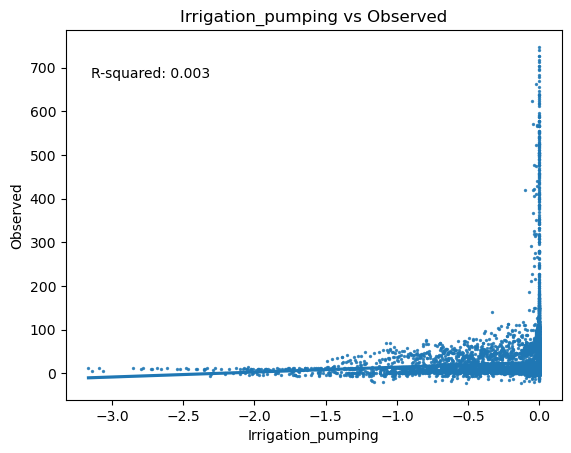

Irrigation_pumping
Pearson Test: PearsonRResult(statistic=0.054756772426893544, pvalue=7.824228676366114e-12)
Average: -0.09071256513373054
Standard Deviation: 0.27372592842301


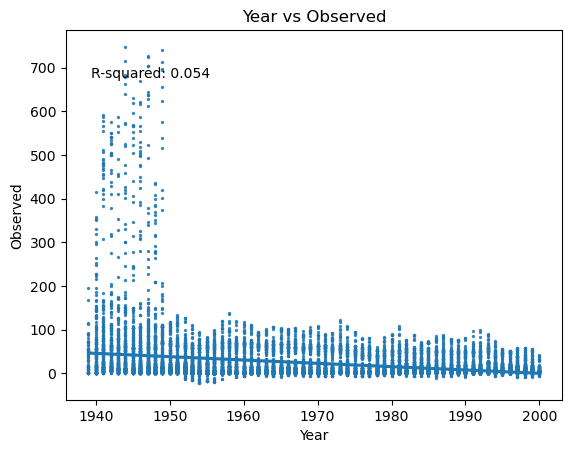

Year
Pearson Test: PearsonRResult(statistic=-0.23330992316129587, pvalue=9.309644668616865e-192)
Average: 1968.5800782502727
Standard Deviation: 17.217232168226335


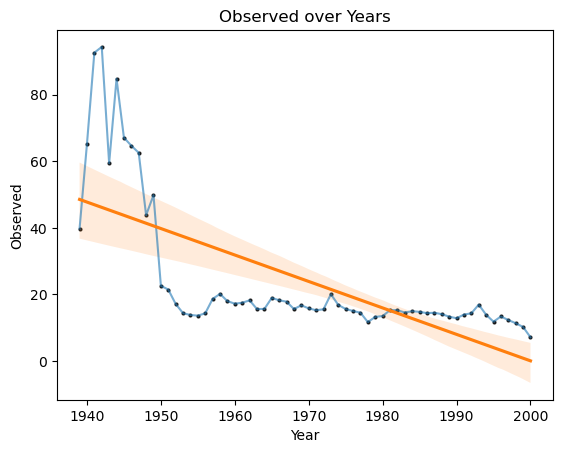

In [3]:

target = 'Observed'

X = df.drop(columns=[])
y = df[target]
display(X)

for col in ['x', 'y','Evapotranspiration', 'Precipitation', 'Irrigation_pumping','Year']:
    data = df[col]
    plt.figure(col)
    ax = sns.regplot(x=data, y=y, scatter_kws={'s':2})
    ax.set_title(f'{col} vs Observed')
    ax.set_ylabel("Observed")
    ax.set_xlabel(col)
    # plt.savefig(f'figures/{col}-plot.pdf')
    # Calculate R-squared value
    slope, intercept, r_value, p_value, std_err = stats.linregress(data, y)
    r_squared = r_value ** 2
    
    # Add text box with R-squared value
    ax.text(0.05, 0.9, f"R-squared: {r_squared:.3f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')
    
    plt.show()
    print(col)
    print(f'Pearson Test: {stats.pearsonr(data, y)}')
    print(f'Average: {data.mean()}')
    print(f'Standard Deviation: {stats.tstd(data)}')

# TODO: Look At Data Over Time
# 
# Resample the DataFrame to a yearly frequency
df_yearly = df.resample('Y', on='Date').mean()

# Plot the 'Observed' column over years
plt.figure()
ax = sns.lineplot(data=df_yearly, x=df_yearly.index.year, y='Observed',alpha = 0.6)
sns.regplot(x=df_yearly.index.year, y='Observed',data=df_yearly, scatter_kws={'s':4,'color':'black'})
ax.set_title('Observed over Years')
ax.set_ylabel('Observed')
ax.set_xlabel('Year')
plt.show()

In [4]:
group_xy = df.groupby(by =['x','y'])[['Precipitation','Observed']].mean().reset_index()
display(group_xy.head(5))

,x,y,Precipitation,Observed
0,721870,14387040,0.000000,0.804866
1,727150,14402880,16.344475,20.676084
2,785230,14566560,17.640205,54.552861
3,790510,14424000,17.895691,17.679449
4,806350,14550720,17.640205,6.962940


R-squared value: 0.09827953924796402


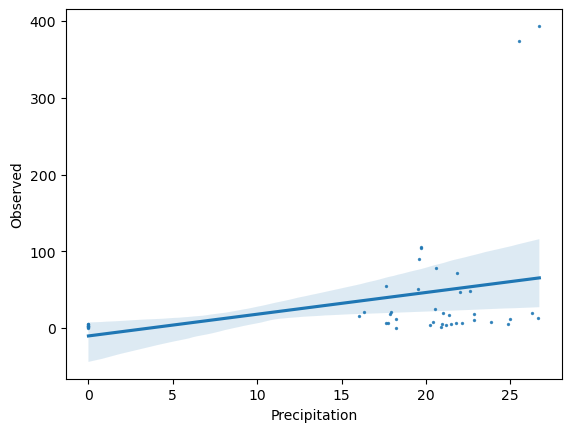

In [5]:
sns.regplot(x='Precipitation', y='Observed',data = group_xy, scatter_kws={'s':2})
from scipy import stats
# Calculate the regression line and R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(group_xy['Precipitation'], group_xy['Observed'])
print('R-squared value:', r_value**2)


### Multiple Linear Regression

In [6]:
group = df.groupby('Segment_id')[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']].median().reset_index()
display(group.head())

,Segment_id,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,40,2.345,26.20,0.000000,14.093951
1,51,0.000,0.00,0.000000,0.000000
2,53,2.965,20.50,0.000000,26.453188
3,55,2.690,21.24,-0.004286,1.269469
4,56,0.000,0.00,0.000000,3.941017


R-squared: -6.523649895444377
MSE: 4759.478659457904
RMSE: 68.98897491235758
Coefficients: {'Segment_id': 0.9184690903972462, 'Evapotranspiration': -39.22994041540714, 'Precipitation': 9.89859985649145, 'Irrigation_pumping': 4520.643317056029}


<AxesSubplot:xlabel='Observed', ylabel='Predicted'>

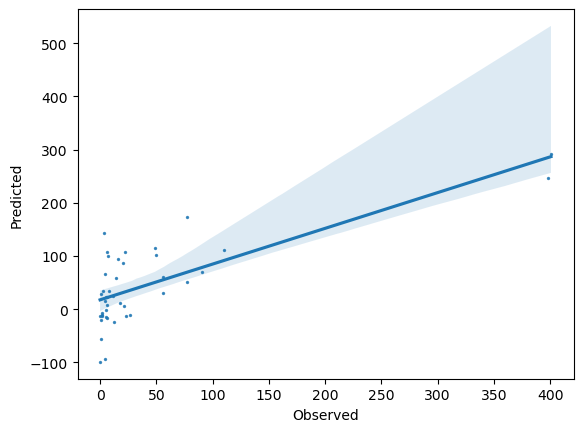

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = group[['Segment_id','Evapotranspiration', 'Precipitation', 'Irrigation_pumping']]
y = group['Observed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Interpret the results
coefficients = dict(zip(X.columns, model.coef_))
print('Coefficients:', coefficients)


# Add the predicted values to the DataFrame
group['Predicted'] = model.predict(X)

# Plot the actual vs predicted values
sns.regplot(x='Observed', y='Predicted', data=group, scatter_kws={'s':2})


In [8]:
req = df[['Segment_id','x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping','Observed']].copy()
req.head()

,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
0,144,1086190,14476800,0.59,18.99,0.0,0.145161
1,144,1086190,14476800,0.97,29.63,0.0,0.445161
2,144,1086190,14476800,1.34,29.63,0.0,1.332203
3,144,1086190,14476800,1.79,29.63,0.0,2.932203
4,144,1086190,14476800,8.23,29.63,0.0,3.728689


In [9]:
train, test = train_test_split(req, test_size=0.2, random_state=123)

# Define the training and testing data
X_train = train.drop(columns=[target], axis=1)
y_train = train[target]

X_test = test.drop(columns=[target], axis=1)
y_test = test[target]

# Train a linear regression model on the original data
model = LinearRegression()
model.fit(X_train, y_train)

print("Original:", model.score(X_test, y_test))

# Train a linear regression model on the scaled data
numerical_data = ['Segment_id','x', 'y', 'Evapotranspiration', 'Precipitation', 'Irrigation_pumping']

ct = make_column_transformer(
    (StandardScaler(), numerical_data),
)

pipe = make_pipeline(
    ct,
    LinearRegression()
)

pipe.fit(X_train, y_train)

print("Scaled:", pipe.score(X_test, y_test))

Original: 0.19990964202163486
Scaled: 0.1999096420216211


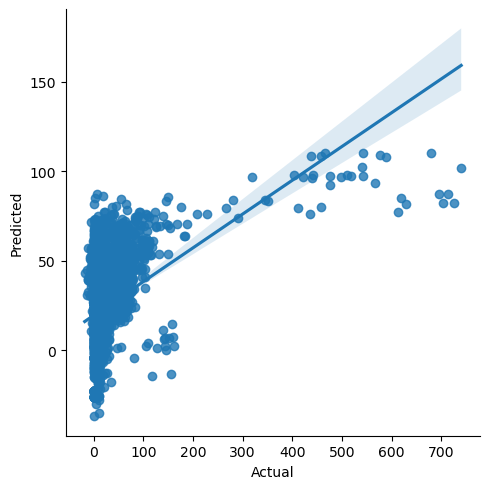

In [10]:
import seaborn as sns

# Create a dataframe with actual and predicted values for the testing data
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})

# Create a scatter plot with a linear regression line
sns.lmplot(x='Actual', y='Predicted', data=predictions)

# Show the plot
plt.show()


In [11]:
import statsmodels.api as sm

# add intercept to the X_train data
X_train = sm.add_constant(X_train)

# fit the multiple linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# print the p-values for each predictor
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Observed   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     540.7
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:45:21   Log-Likelihood:                -66292.
No. Observations:               12472   AIC:                         1.326e+05
Df Residuals:                   12465   BIC:                         1.327e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                415.5103     85